

# Sparse Binary Sensing Matrices
    :depth: 2
    :local:


A (random) sparse binary sensing matrix has a very simple design.
Assume that the signal space is $\RR^N$ and the measurement
space is $\RR^M$.
Every column of a sparse binary sensing matrix has a 1 in
exactly $d$ positions and 0s elsewhere. The indices
at which ones are present are randomly selected for each column.

Following is an example sparse binary matrix with 3 ones in
each column

\begin{align}\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1\\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 1\\
    1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\
    1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\
    0 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 1\\
    0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
    \end{bmatrix}\end{align}

From the perspective of algorithm design, we often require that
the sensing matrix have unit norm columns. This can be easily
attained for sparse binary matrices by scaling them with
$\frac{1}{\sqrt{d}}$.


JAX provides an efficient way of storing sparse matrices in BCOO
format. By default we employ this storage format for the (random) sparse
binary matrices.


Necessary imports



In [3]:
import math
import cr.nimble as crn
import cr.sparse as crs
import cr.sparse.dict as crdict
import cr.sparse.data as crdata
import cr.sparse.lop as crlop
import cr.sparse.plots as crplots
import numpy as np
import jax
import jax.numpy as jnp
from jax import random

Some random number generation keys



In [4]:
key = random.PRNGKey(3)
keys = random.split(key, 5)

## Creating Sparse Binary Sensing Matrices



In [5]:
# Matrix parameters
m = 10
n = 16
d = 4

# construct a sparse binary sensing matrix
A = crdict.sparse_binary_mtx(keys[0], m, n, d, normalize_atoms=False)
# It is stored in a compressed BCOO format
print(A)

BCOO(uint8[10, 16], nse=64)


If we wish to see its contents



In [6]:
Ad = A.todense()
print(Ad)

[[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0]
 [0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1]
 [1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0]
 [0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0]
 [1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]
 [1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]]


We can quickly check that all columns have d ones



In [5]:
print(jnp.sum(Ad, 0))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


By convention, we generate normalized sensing matrices by default.
However, in the case of sparse binary matrices, it is more efficient
to work with the unnormalized sensing matrix



In [6]:
A = crdict.sparse_binary_mtx(keys[0], m, n, d)
print(A.todense())

[[0.  0.  0.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5 0.  0.  0.5 0.  0.  0.5 0.  0.5 0. ]
 [0.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.  0.5 0.  0.5 0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.5 0.5 0.  0.  0.  0.5 0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.5 0.  0.5 0.5 0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5 0.  0.5 0.5 0.  0.  0. ]
 [0.5 0.  0.  0.  0.5 0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.5 0.  0.5 0.  0.  0.5 0.  0.5 0.5 0.  0.5 0.5 0. ]]


## Sparse Binary Sensing Linear Operators
It is often advantageous to work with matrices wrapped
in our linear operator design.
Let us construct the sensing matrix as a linear operator



In [7]:
T = crlop.sparse_binary_dict(keys[0], m, n, d, normalize_atoms=False)

We can extract the contents by multiplying with an identity matrix



In [8]:
print(T.times(jnp.eye(n, dtype=int)))

[[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0]
 [0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1]
 [1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0]
 [0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0]
 [1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]
 [1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]]


We can keep the normalization of the sensing matrix has a separate
scaling operator



In [8]:
# Let us construct a scaling operator
d_scale = 1/ math.sqrt(d)
T_scale = crlop.scalar_mult(d_scale, m)
# Let us combine the scaling operator with the unnormalized sensing operator
T_normed = crlop.compose(T_scale, T)
# Verify the normalized operator
print(T_normed.times(jnp.eye(n, dtype=int)))

[[0.  0.  0.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.  0.5 0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5 0.  0.  0.5 0.  0.  0.5 0.  0.5 0. ]
 [0.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.  0.5 0.  0.5 0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.5 0.5 0.  0.  0.  0.5 0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.5 0.  0.5 0.5 0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.5 0.  0.  0.5 0.  0.  0.5 0.5 0.  0.5 0.5 0.  0.  0. ]
 [0.5 0.  0.  0.  0.5 0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.5 0.  0.5 0.  0.  0.5 0.  0.5 0.5 0.  0.5 0.5 0. ]]


## Compressive Sensing
We shall use a larger problem to demonstrate the sensing
capabilities of the sparse binary sensing operator.



In [9]:
# Signal space dimension
n = 1024
# Measurement space dimension
m = 256
# Number of ones in each column
d = 16
# Sparsity level of the signal to be sensed
k = 40

Let us construct the unnormalized as well as normalized sensing operators.
We shall use the unnormalized one during sensing but the normalized
one during reconstruction.



In [10]:
d_scale = 1/ math.sqrt(d)
T = crlop.sparse_binary_dict(keys[1], m, n, d, normalize_atoms=False)
T_scale = crlop.scalar_mult(d_scale, m)
T_normed = crlop.compose(T_scale, T)

We can quickly visualize the sparsity pattern of this sensing matrix



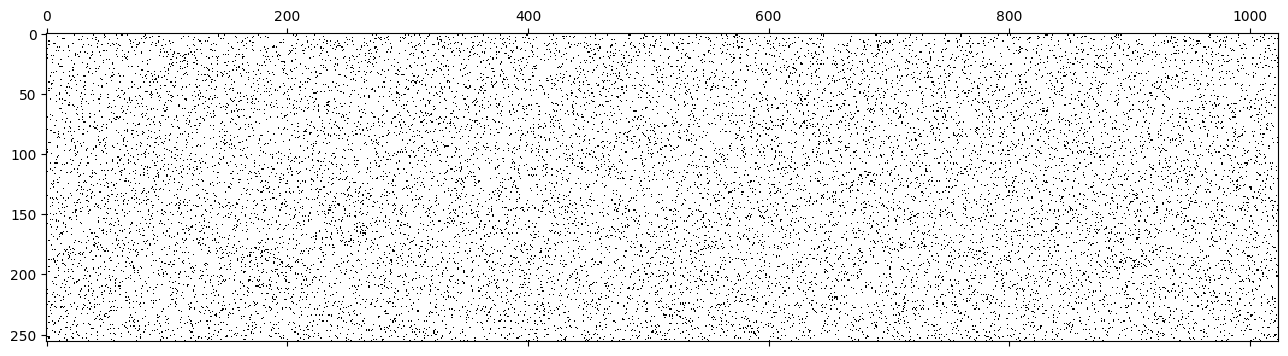

In [11]:
A = T.times(jnp.eye(n, dtype=int))
ax = crplots.one_plot()
ax.spy(A);

Let us construct a sparse signal



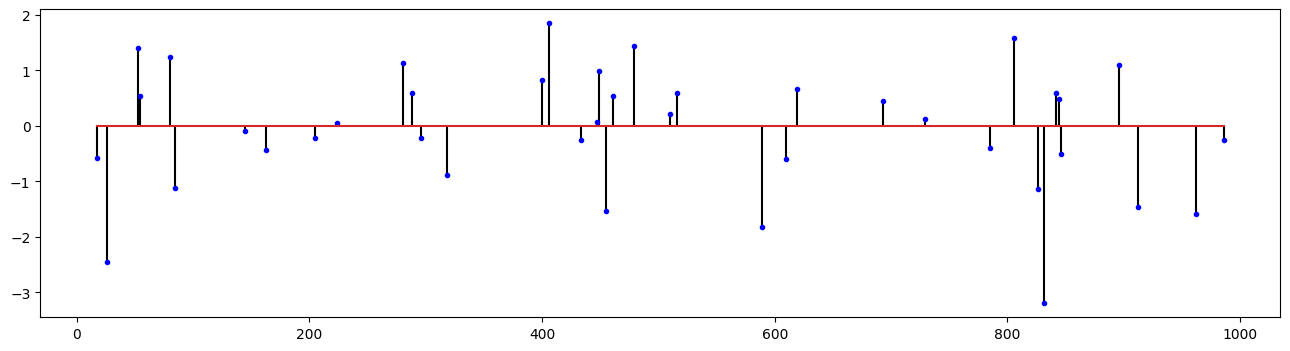

In [ ]:
x, omega = crdata.sparse_normal_representations(keys[2], n, k)
ax = crplots.one_plot()
crplots.plot_sparse_signal(ax, x)

In [14]:
import mne

raw = mne.io.read_raw_edf('/home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/CHBMIT/chb07/chb07_02.edf')

# (n_samples, n_channels)
data = raw.get_data().T[:, :-1]

x = data[:n, 0]  # Take the first channel and the first N samples

Extracting EDF parameters from /home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/CHBMIT/chb07/chb07_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_120963/3427114223.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('/home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/files/CHBMIT/chb07/chb07_02.edf')


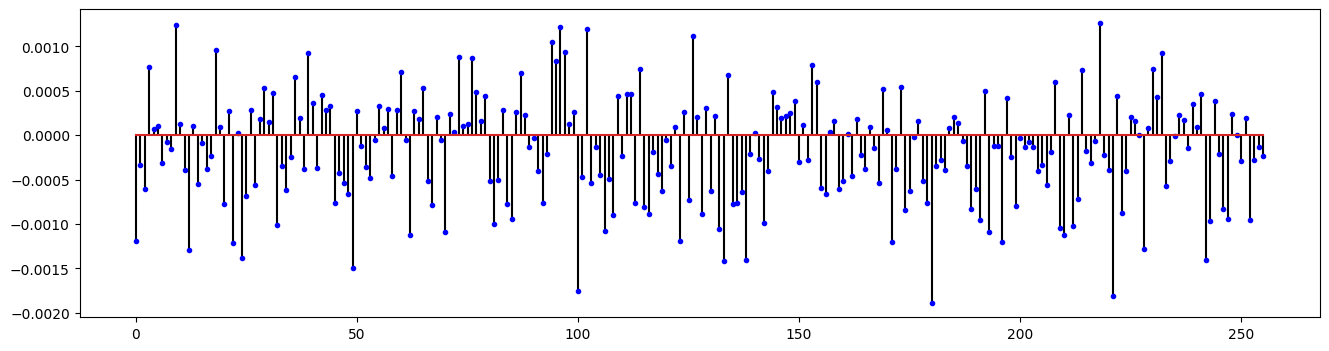

In [15]:
y = T.times(x)
ax = crplots.one_plot()
crplots.plot_sparse_signal(ax, y)

## Sparse Recovery
We shall use various algorithms for reconstructing the original signal



### CoSaMP



iterations 256
m=256, n=1024, k=250
r_norm 3.636222e-03
x_norm 5.137338e-03
SNR: 1.22 dB, PRD: 87 %


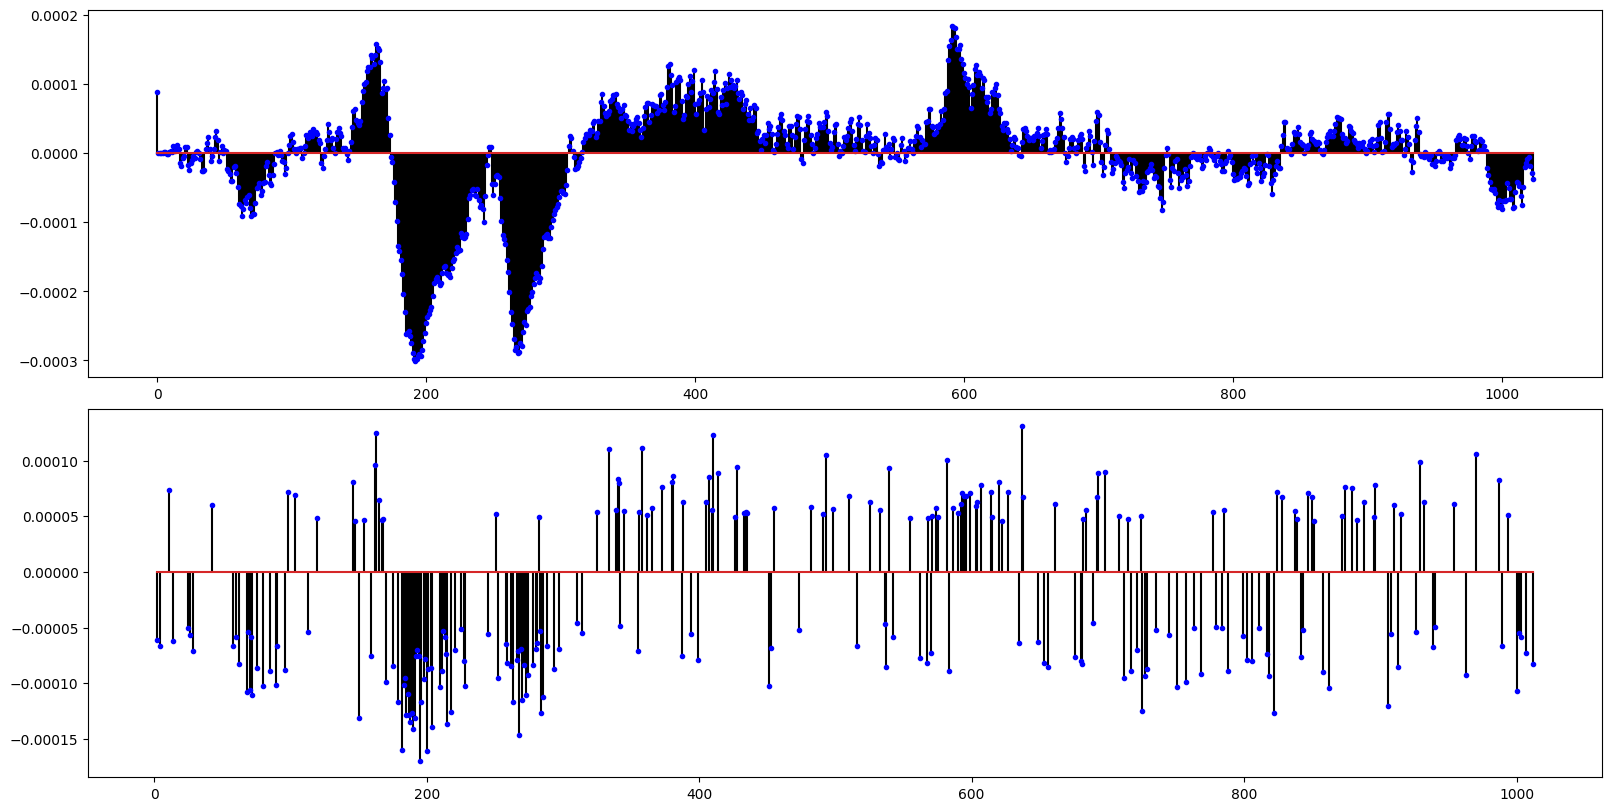

In [17]:
# Import the algorithm
from cr.sparse.pursuit import cosamp
# Solve the problem
sol =  cosamp.operator_solve_jit(T_normed, y, 250)
print(sol)
# We need to scale the solution since the measurements were unscaled
x_hat = sol.x * d_scale
# Compute the SNR and PRD
print(f'SNR: {crn.signal_noise_ratio(x, x_hat):.2f} dB, PRD: {crn.percent_rms_diff(x, x_hat):.0f} %')
# Plot the original and the reconstructed signal
ax = crplots.h_plots(2)
crplots.plot_sparse_signals(ax, x, x_hat)

### Subspace Pursuit
Import the algorithm



/home/jplp/Disco X/UFMG/2025/TCC/Códigos/eeg_cs/.venv/lib/python3.12/site-packages/cr/sparse/_src/pursuit/sp.py:135: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  x_I_prev = jnp.zeros(K, dtype=dtype)


iterations 20
m=256, n=1024, k=40
r_norm 4.735798e-03
x_norm 8.663407e-03
SNR: -0.89 dB, PRD: 111 %


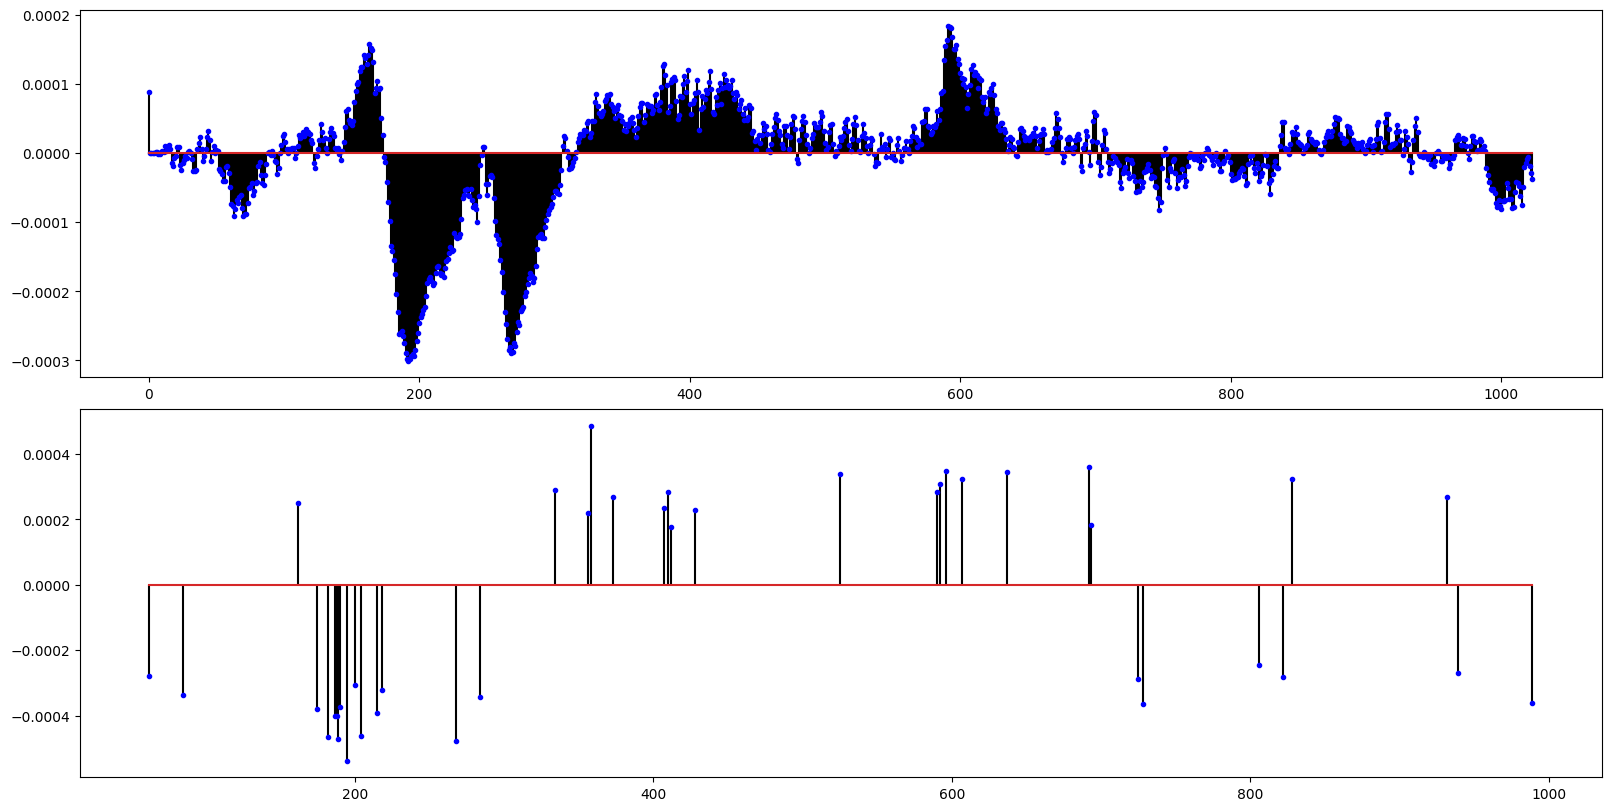

In [18]:
from cr.sparse.pursuit import sp
# Solve the problem
sol =  sp.operator_solve_jit(T_normed, y, k)
print(sol)
# We need to scale the solution since the measurements were unscaled
x_hat = sol.x * d_scale
# Compute the SNR and PRD
print(f'SNR: {crn.signal_noise_ratio(x, x_hat):.2f} dB, PRD: {crn.percent_rms_diff(x, x_hat):.0f} %')
# Plot the original and the reconstructed signal
ax = crplots.h_plots(2)
crplots.plot_sparse_signals(ax, x, x_hat)

### Hard Thresholding Pursuit
Import the algorithm



iterations 20
m=256, n=1024, k=200
r_norm 6.998727e-04
x_norm 2.430965e-02
SNR: -8.09 dB, PRD: 254 %


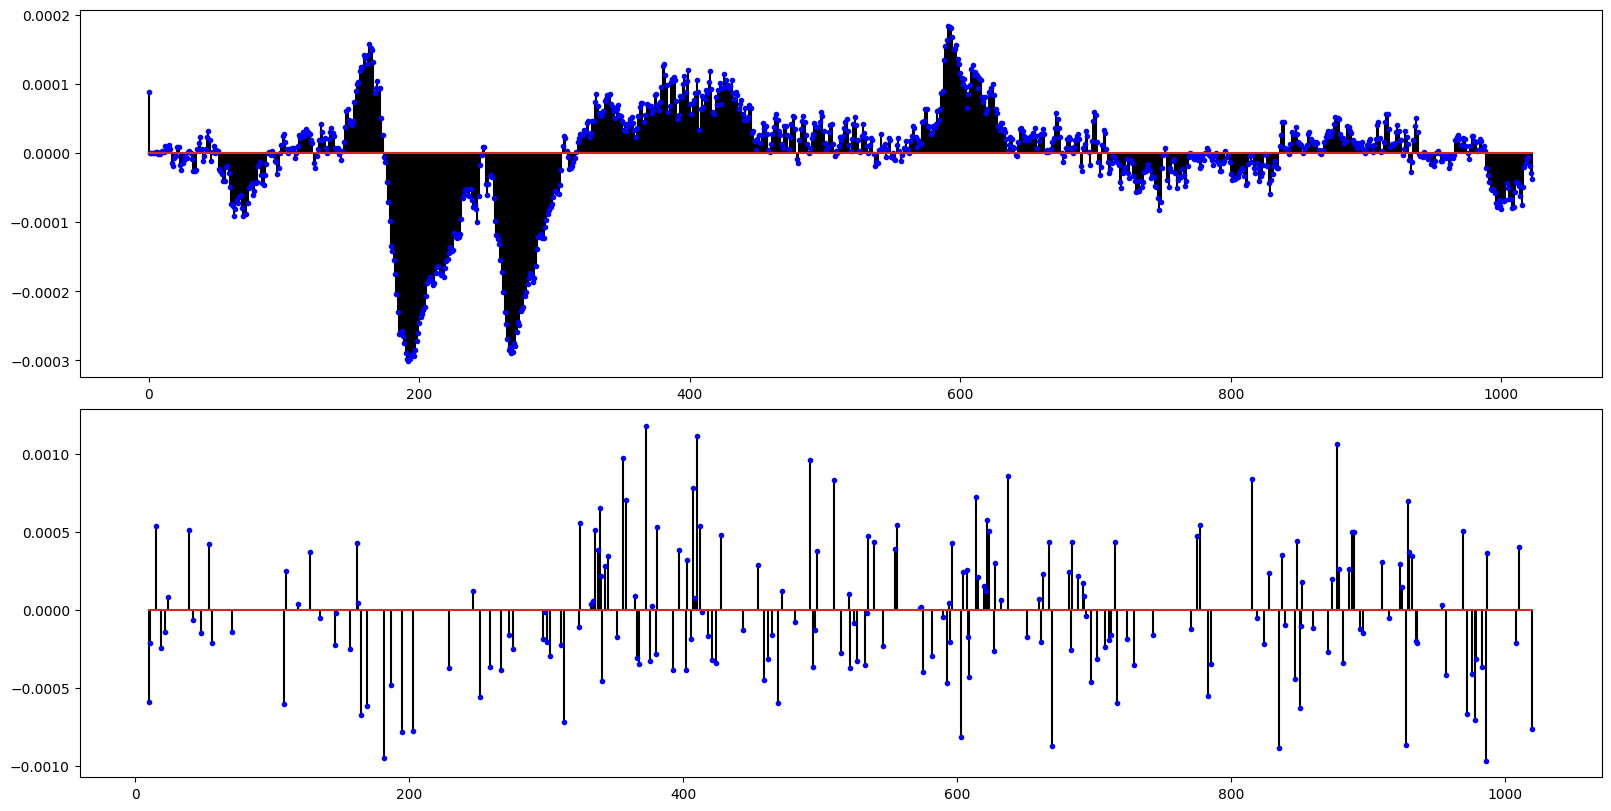

In [21]:
from cr.sparse.pursuit import htp
# Solve the problem
sol =  htp.operator_solve_jit(T_normed, y, 200)
print(sol)
# We need to scale the solution since the measurements were unscaled
x_hat = sol.x * d_scale
# Compute the SNR and PRD
print(f'SNR: {crn.signal_noise_ratio(x, x_hat):.2f} dB, PRD: {crn.percent_rms_diff(x, x_hat):.0f} %')
# Plot the original and the reconstructed signal
ax = crplots.h_plots(2)
crplots.plot_sparse_signals(ax, x, x_hat)

### Truncated Newton Interior Points Method
Import the algorithm



iterations 1
n_times 1
n_trans 2
r_norm 1.005147e-02
SNR: 0.00 dB, PRD: 100 %


ValueError: zero-size array to reduction operation min which has no identity

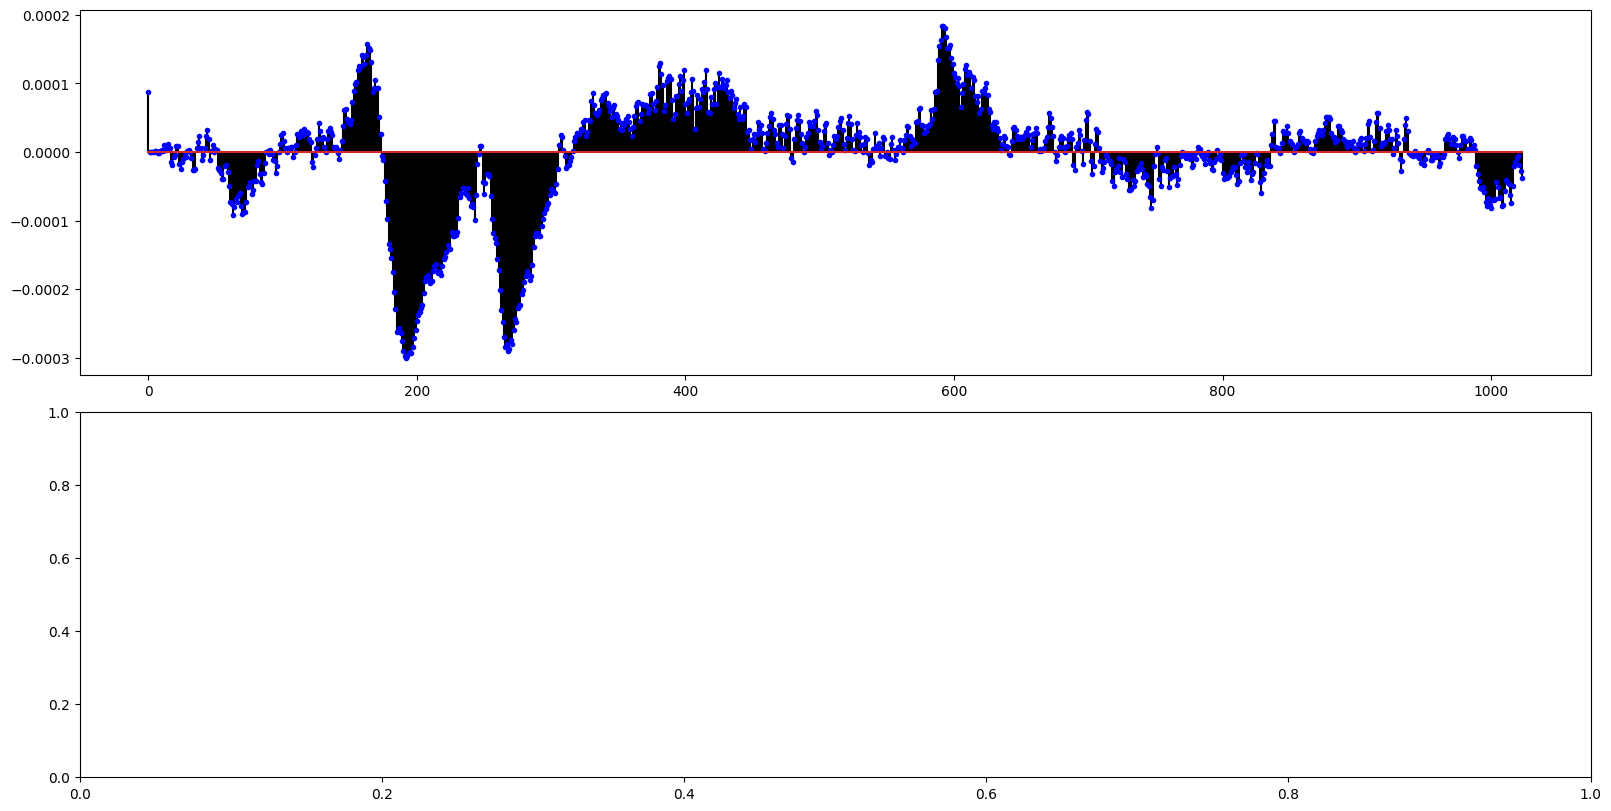

In [22]:
from cr.sparse.cvx import l1ls
# Solve the problem
# Note that this algorithm doesn't require sparsity level k as input
sol =  l1ls.solve_jit(T_normed, y, 1e-2)
print(sol)
# We need to scale the solution since the measurements were unscaled
x_hat = sol.x * d_scale
# Compute the SNR and PRD
print(f'SNR: {crn.signal_noise_ratio(x, x_hat):.2f} dB, PRD: {crn.percent_rms_diff(x, x_hat):.0f} %')
# Plot the original and the reconstructed signal
ax = crplots.h_plots(2)
crplots.plot_sparse_signals(ax, x, x_hat)